## League of Legends
### H.I.T 
#### Data Mining  - Final Project, 2018
#### Submited to: Jonathan Schler, PhD
#### Submitted By: Gilad Gecht - 205642028, Shlomo Hanah - 206628737

In [1]:
from IPython.display import Image
Image(url= 'https://images.washingtonpost.com?op=resize&url=https://s3.amazonaws.com/wapopartners.com/dbknews-wp/wp-content/uploads/2017/03/21161246/16315424727_c6347f2b58_b.jpg&mode=crop&w=1200&q=99')

# Background
League of Legends is a MOBA (Multiplayer Online Battle Arena) game,
the game has been out since October 27th, 2009.It has over 140 playable character and is currently the most played online game with a community of over 27 million people per day.

##### In-game information:
The game is built around a map called Summoner's Rift, although it has numerous maps, Summoner's Rift remains the main battle map used.
The game consists of 2 five-man teams, each placed in a different corner of the map.
Each team member has a specific and unique role, and these roles are the following:
1. Top Laner -  Placed in the upper part of the map
2. Jungler - Doesnt belong in a specific lane, rather he uses the rest of the map for his gameplay
3. Mid Laner - Placed in the middle part of the map, also called in most cases AP Carry
4. AD Carry - Placed in the bottom part of the map alongside the Support
5. Support- Placed in the bottom part of the map alongside the AD Carry

###### NOTE:
keep in mind that although the game has "Specific" designed roles, in some cases people tend to neglect this meta and take a different approach. 
for example: 2 Top laners instead of having a Jungler, or unique champions designated for a certain role but instead are played as a different role.

The game ends when a team destroys the other's team "Nexus", or a team needs to surrender the game by a vote (This can only be done after the 20-minute mark).

In [2]:
Image(url='http://www.lol-wallpapers.com/wp-content/uploads/2017/01/Summoners-Rift-Overview-League-of-Legends-Artwork-Wallpaper-lol-1024x729.jpg',width=1000,height=1000)

#### Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

* Quick overview of the Dataset

In [4]:
champs = pd.read_csv('champs.csv')
champs.head()

,name,id
0,Jax,24
1,Sona,37
2,Tristana,18
3,Varus,110
4,Fiora,114


In [5]:
matches = pd.read_csv('matches.csv')
matches.head()

,id,gameid,platformid,queueid,seasonid,duration,creation,version
0,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675
1,11,3187425281,EUW1,420,8,1693,1495066760778,7.10.187.9675
2,12,3187269801,EUW1,420,8,1482,1495053375889,7.10.187.9675
3,13,3187252065,EUW1,420,8,1954,1495050993613,7.10.187.9675
4,14,3187201038,EUW1,420,8,2067,1495047893400,7.10.187.9675


In [6]:
participants = pd.read_csv('participants.csv')
participants.head()

,id,matchid,player,championid,ss1,ss2,role,position
0,9,10,1,19,4,11,NONE,JUNGLE
1,10,10,2,267,3,4,DUO_SUPPORT,BOT
2,11,10,3,119,7,4,DUO_CARRY,BOT
3,12,10,4,114,12,4,SOLO,TOP
4,13,10,5,112,4,3,SOLO,MID


In [7]:
stats1 = pd.read_csv('stats1.csv')
stats2 = pd.read_csv('stats2.csv')
stats = stats1.append(stats2)
print(stats.columns)
stats.head()

C:\Users\Gilad\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['id', 'win', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6',
       'trinket', 'kills', 'deaths', 'assists', 'largestkillingspree',
       'largestmultikill', 'killingsprees', 'longesttimespentliving',
       'doublekills', 'triplekills', 'quadrakills', 'pentakills',
       'legendarykills', 'totdmgdealt', 'magicdmgdealt', 'physicaldmgdealt',
       'truedmgdealt', 'largestcrit', 'totdmgtochamp', 'magicdmgtochamp',
       'physdmgtochamp', 'truedmgtochamp', 'totheal', 'totunitshealed',
       'dmgselfmit', 'dmgtoobj', 'dmgtoturrets', 'visionscore', 'timecc',
       'totdmgtaken', 'magicdmgtaken', 'physdmgtaken', 'truedmgtaken',
       'goldearned', 'goldspent', 'turretkills', 'inhibkills',
       'totminionskilled', 'neutralminionskilled', 'ownjunglekills',
       'enemyjunglekills', 'totcctimedealt', 'champlvl', 'pinksbought',
       'wardsbought', 'wardsplaced', 'wardskilled', 'firstblood'],
      dtype='object')


,id,win,item1,item2,item3,item4,item5,item6,trinket,kills,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,9,0,3748,2003,3111,3053,1419,1042,3340,6,...,69,42,27,610,13,0,0,10,0,0
1,10,0,2301,3111,3190,3107,0,0,3364,0,...,1,1,0,211,14,1,0,17,3,0
2,11,0,1055,3072,3006,3031,3046,1036,3340,7,...,3,1,2,182,14,1,0,13,5,0
3,12,0,1029,3078,3156,1001,3053,0,3340,5,...,6,6,0,106,15,0,0,3,0,0
4,13,0,3020,1058,3198,3102,1052,1026,3340,2,...,4,3,1,159,15,0,0,10,0,0


Lets clean the data (Credit for https://www.kaggle.com/laowingkin/lol-how-to-win-the-world-championship)

In [8]:
df = pd.merge(participants, stats, how = 'left', on = ['id'], suffixes=('', '_y'))
df = pd.merge(df, champs, how = 'left', left_on = 'championid', right_on = 'id', suffixes=('', '_y'))
df = pd.merge(df, matches, how = 'left', left_on = 'matchid', right_on = 'id', suffixes=('', '_y'))

def final_position(row):
    if row['role'] in ('DUO_SUPPORT', 'DUO_CARRY'):
        return row['role']
    else:
        return row['position']

df['adjposition'] = df.apply(final_position, axis = 1) 

df['team'] = df['player'].apply(lambda x: '1' if x <= 5 else '2')
df['team_role'] = df['team'] + ' - ' + df['adjposition']

# remove matchid with duplicate roles, e.g. 3 MID in same team, etc
remove_index = []
for i in ('1 - MID', '1 - TOP', '1 - DUO_SUPPORT', '1 - DUO_CARRY', '1 - JUNGLE', '2 - MID', '2 - TOP', '2 - DUO_SUPPORT', '2 - DUO_CARRY', '2 - JUNGLE'):
    df_remove = df[df['team_role'] == i].groupby('matchid').agg({'team_role':'count'})
    remove_index.extend(df_remove[df_remove['team_role']!=1].index.values)
    
# remove unclassified BOT, correct ones should be DUO_SUPPORT OR DUO_CARRY
remove_index.extend(df[df['adjposition'] == 'BOT']['matchid'].unique())
remove_index = list(set(remove_index))

df = df[~df['matchid'].isin(remove_index)]

In [9]:
df = df[['id', 'matchid', 'player', 'name', 'adjposition', 'win', 'kills', 'deaths', 'assists','largestmultikill', 'turretkills','totdmgtochamp', 'totheal', 'totminionskilled', 'goldspent', 'totdmgtaken', 'inhibkills', 'pinksbought', 'wardsplaced', 'duration', 'platformid', 'seasonid', 'version']]
df.head(10)

,id,matchid,player,name,adjposition,win,kills,deaths,assists,largestmultikill,...,totminionskilled,goldspent,totdmgtaken,inhibkills,pinksbought,wardsplaced,duration,platformid,seasonid,version
0,9,10,1,Warwick,JUNGLE,0.0,6.0,10.0,1.0,2.0,...,42.0,10275.0,41446.0,0.0,0.0,10.0,1909,EUW1,8,7.10.187.9675
1,10,10,2,Nami,DUO_SUPPORT,0.0,0.0,2.0,12.0,0.0,...,17.0,7975.0,17769.0,0.0,1.0,17.0,1909,EUW1,8,7.10.187.9675
2,11,10,3,Draven,DUO_CARRY,0.0,7.0,8.0,5.0,2.0,...,205.0,11775.0,25627.0,0.0,1.0,13.0,1909,EUW1,8,7.10.187.9675
3,12,10,4,Fiora,TOP,0.0,5.0,11.0,2.0,1.0,...,164.0,10683.0,31705.0,0.0,0.0,3.0,1909,EUW1,8,7.10.187.9675
4,13,10,5,Viktor,MID,0.0,2.0,8.0,2.0,1.0,...,235.0,10485.0,20585.0,0.0,0.0,10.0,1909,EUW1,8,7.10.187.9675
5,14,10,6,Skarner,JUNGLE,1.0,3.0,3.0,9.0,1.0,...,28.0,11758.0,22708.0,0.0,0.0,8.0,1909,EUW1,8,7.10.187.9675
6,15,10,7,Galio,TOP,1.0,4.0,5.0,11.0,1.0,...,187.0,11575.0,21719.0,0.0,1.0,7.0,1909,EUW1,8,7.10.187.9675
7,16,10,8,Ahri,MID,1.0,13.0,4.0,8.0,2.0,...,183.0,13750.0,19174.0,0.0,0.0,8.0,1909,EUW1,8,7.10.187.9675
8,17,10,9,Jinx,DUO_CARRY,1.0,15.0,3.0,9.0,1.0,...,191.0,14375.0,17655.0,2.0,1.0,6.0,1909,EUW1,8,7.10.187.9675
9,18,10,10,VelKoz,DUO_SUPPORT,1.0,4.0,5.0,19.0,1.0,...,72.0,11675.0,13443.0,0.0,5.0,25.0,1909,EUW1,8,7.10.187.9675


Lets add a KDA ratio column (KDA = (Kills + Assists)/deaths).
One problem is facing games where a player didn't die at all, so for the time being we'll give players that did not die, 1 death. this does make a difference but not that much that would affect our results in such a drastic way.



In [10]:
df['deaths'] = df['deaths'].apply(lambda x: 1 if x==0 else x)
df['KDA'] = (df['kills'] + df['assists'])/(df['deaths'])

Lets try to first predict whether a team will win or lose.
using all of the features which are not string/objects

In [11]:
no_strings = df.copy()
no_strings = no_strings.drop(['id', 'matchid', 'player', 'name', 'adjposition'
                              , 'platformid', 'version'],axis=1)

no_strings.head()

,win,kills,deaths,assists,largestmultikill,turretkills,totdmgtochamp,totheal,totminionskilled,goldspent,totdmgtaken,inhibkills,pinksbought,wardsplaced,duration,seasonid,KDA
0,0.0,6.0,10.0,1.0,2.0,0.0,9101.0,15160.0,42.0,10275.0,41446.0,0.0,0.0,10.0,1909,8,0.700000
1,0.0,0.0,2.0,12.0,0.0,1.0,8478.0,11707.0,17.0,7975.0,17769.0,0.0,1.0,17.0,1909,8,6.000000
2,0.0,7.0,8.0,5.0,2.0,0.0,14425.0,2283.0,205.0,11775.0,25627.0,0.0,1.0,13.0,1909,8,1.500000
3,0.0,5.0,11.0,2.0,1.0,3.0,15267.0,4252.0,164.0,10683.0,31705.0,0.0,0.0,3.0,1909,8,0.636364
4,0.0,2.0,8.0,2.0,1.0,1.0,18229.0,1525.0,235.0,10485.0,20585.0,0.0,0.0,10.0,1909,8,0.500000


In [12]:
#Lets check for any Missing values which will cuase trouble
no_strings.isnull().sum()

win                 3
kills               3
deaths              3
assists             3
largestmultikill    3
turretkills         3
totdmgtochamp       3
totheal             3
totminionskilled    3
goldspent           3
totdmgtaken         3
inhibkills          3
pinksbought         3
wardsplaced         3
duration            0
seasonid            0
KDA                 3
dtype: int64

We can see there are some missing values.
But considering the fact that our dataset is over 1400000 rows, dropping 3 rows wont change it that drastically

In [13]:
no_strings = no_strings.dropna()

In [14]:
from sklearn.preprocessing import Normalizer
#Splitting our dataset for our Labels and our Features
Y = no_strings.win
X = no_strings.drop('win',axis=1)

#In order to classify our features, we'll have to scale our features
norm_win = Normalizer()
norm_win = norm_win.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Splitting our features and labels to train and test with 0.8 for train 0.2 for test
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=42)
log_reg = LogisticRegression()
log_reg.fit(xtrain,ytrain)
acc_score = log_reg.score(xtest,ytest)
print("Logistic Regression:\n")
print("Logistic Regression win/lose Accuracy Score: {}".format(acc_score))

Logistic Regression:

Logistic Regression win/lose Accuracy Score: 0.8357632067601388


Now lets see if using a differnt classifier will improve our score

In [16]:
from sklearn.ensemble import RandomForestClassifier
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=42)
rfc = RandomForestClassifier(max_depth=10,random_state=42)
rfc.fit(xtrain,ytrain)
acc_score = rfc.score(xtest,ytest)
print("Random Forest Classifier:\n")
print("Random Forest Classifier win/lose Accuracy Score: {}".format(acc_score))

Random Forest Classifier:

Random Forest Classifier win/lose Accuracy Score: 0.8438971716138756


We see that the Random Forest Classifier gave us a higher accuracy percentage.
Lets see how many it got right

In [17]:
from sklearn.metrics import confusion_matrix
y_pred = rfc.predict(xtest)
conf_mat = confusion_matrix(ytest,y_pred)
print(conf_mat)

[[126352  22307]
 [ 24098 124515]]


Lets see what were the most significant features that impact the classifier

In [18]:
coef = list(sorted(zip(xtrain.columns,abs(log_reg.coef_[0])),key=lambda x: x[1]))
coef_table = pd.DataFrame(np.array(coef).reshape(-1,2),columns=['Attributes','Coefficient'])
print('Coefficient for every feature:\n')
print(coef_table)

Coefficient for every feature:

          Attributes             Coefficient
0      totdmgtochamp  2.1108336816701657e-05
1            totheal  2.2130988755828023e-05
2        totdmgtaken  2.8121863270625422e-05
3          goldspent   0.0002289137154139599
4           duration   0.0016533270964887252
5   totminionskilled   0.0020088702409808133
6        wardsplaced    0.014353496620652238
7        pinksbought     0.01660879096164538
8           seasonid    0.052913951686767824
9   largestmultikill     0.05419607894991802
10             kills     0.06622701136871506
11            deaths       0.161877570825873
12           assists     0.16538263374435846
13               KDA       0.299738149840619
14        inhibkills     0.40343488201905736
15       turretkills      0.7591762921545052


Lets visualize that

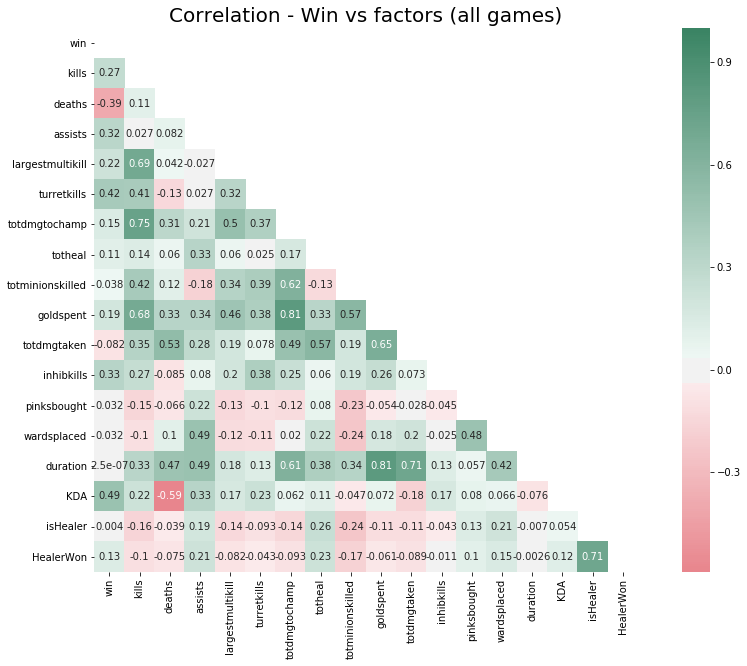

In [105]:
df_corr = df._get_numeric_data()
df_corr = df_corr.drop(['id','matchid','player','seasonid'],axis=1)

mask = np.zeros_like(df_corr.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sb.diverging_palette(10,150,as_cmap=True)

plt.figure(figsize=(16,10))
sb.heatmap(df_corr.corr(),cmap=cmap,annot=True,mask = mask,square = True,center = 0)
plt.title('Correlation - Win vs factors (all games)',size=20)
plt.show()

Lets try to see the correlation of rare cases where a character had over 4 kills in a row.
 ** this is called a "Pentakill"


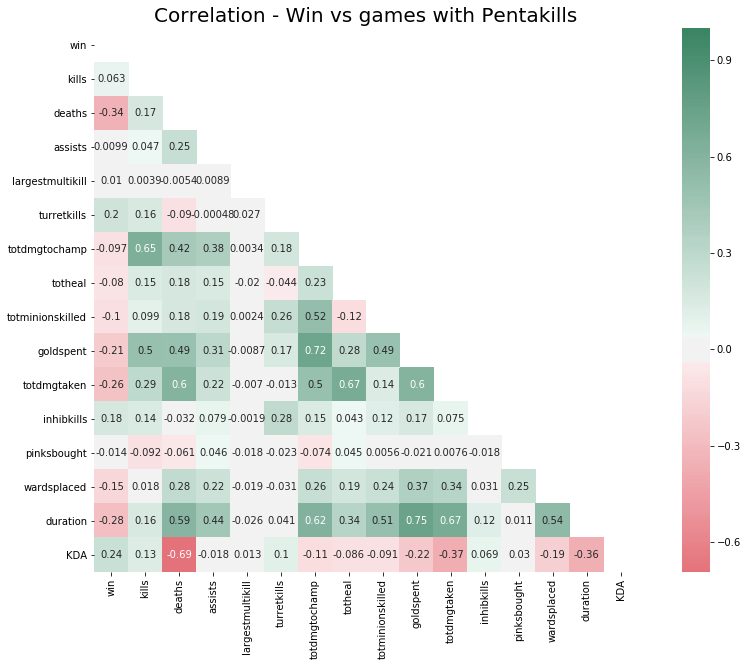

In [20]:
df_corr = df._get_numeric_data()
df_corr = df_corr.drop(['id','matchid','player','seasonid'],axis=1)
df_corr = df_corr[df_corr.largestmultikill>4]

mask = np.zeros_like(df_corr.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sb.diverging_palette(10,150,as_cmap=True)

plt.figure(figsize=(16,10))
sb.heatmap(df_corr.corr(),cmap=cmap,annot=True,mask = mask,square = True,center = 0)
plt.title('Correlation - Win vs games with Pentakills',size=20)
plt.show()

Some raw statistics.
We'll see the top 10 most picked champion for each role
###### NOTE: not all champions were released at the same time, so dividing and sorting by season will be perhaps more precise

In [21]:

Top = df[df.adjposition == 'TOP']
Top_count = Top.name.value_counts()
top10top = Top_count[:10]

Jungle = df[df.adjposition=='JUNGLE']
Jungle_count = Jungle.name.value_counts()
top10Jungle = Jungle_count[:10]

Mid = df[df.adjposition == 'MID']
Mid_count = Mid.name.value_counts()
top10Mid = Mid_count[:10]

ADC = df[df.adjposition =='DUO_CARRY']
ADC_count = ADC.name.value_counts()
top10ADC = ADC_count[:10]

support = df[df.adjposition=='DUO_SUPPORT']
support_count = support.name.value_counts()
top10support = support_count[:10]

Text(0.5,1,'Top 10 Supports Picked')

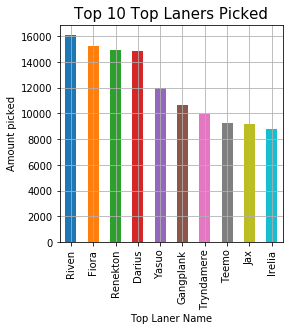

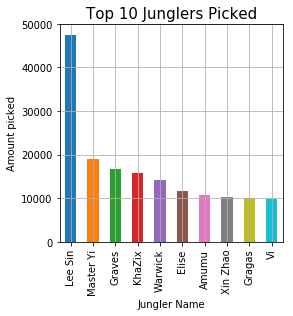

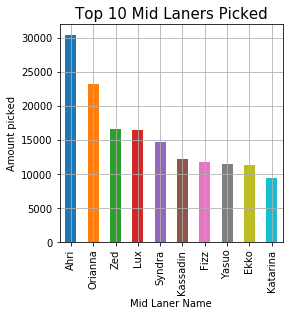

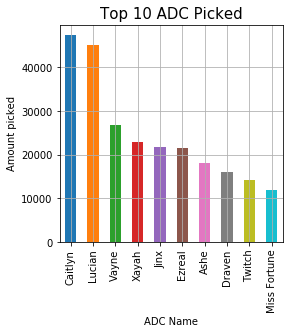

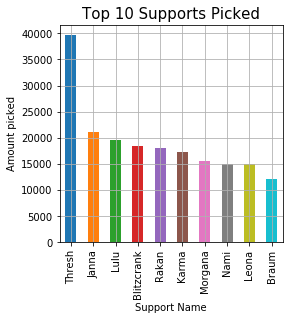

In [22]:
f,ax= plt.subplots(figsize=(4,4))
top10top.plot(kind='bar')
plt.grid(True)
plt.ylabel('Amount picked',size=10)
plt.xlabel('Top Laner Name',size=10)
plt.title('Top 10 Top Laners Picked',size=15)

f,ax= plt.subplots(figsize=(4,4))
top10Jungle.plot(kind='bar')
plt.grid(True)
plt.ylabel('Amount picked',size=10)
plt.xlabel('Jungler Name',size=10)
plt.title('Top 10 Junglers Picked',size=15)

f,ax= plt.subplots(figsize=(4,4))
top10Mid.plot(kind='bar')
plt.grid(True)
plt.ylabel('Amount picked',size=10)
plt.xlabel('Mid Laner Name',size=10)
plt.title('Top 10 Mid Laners Picked',size=15)

f,ax= plt.subplots(figsize=(4,4))
top10ADC.plot(kind='bar')
plt.grid(True)
plt.ylabel('Amount picked',size=10)
plt.xlabel('ADC Name',size=10)
plt.title('Top 10 ADC Picked',size=15)

f,ax= plt.subplots(figsize=(4,4))
top10support.plot(kind='bar')
plt.grid(True)
plt.ylabel('Amount picked',size=10)
plt.xlabel('Support Name',size=10)
plt.title('Top 10 Supports Picked',size=15)

Now lets see the distribution of supports

In [104]:
#Healers vs Non-Healers

healers= {'Nami','Soraka','Sona','Bard','Taric'}
df['isHealer'] = df.name.apply(lambda row: 1 if row in healers else 0 )

OnlySupports = pd.DataFrame()
OnlySupports = df.ix[(df.adjposition == 'DUO_SUPPORT')]

C:\Users\Gilad\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


Distribution of supports:
0    246115
1     51158
Name: isHealer, dtype: int64

Distribution in percentage:
0    0.827909
1    0.172091
Name: isHealer, dtype: float64


C:\Users\Gilad\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


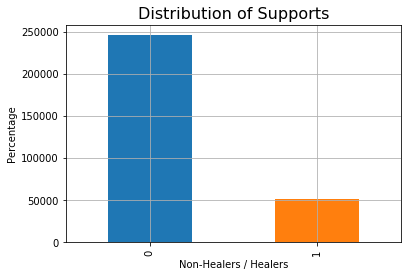

In [24]:
print("Distribution of supports:")
Support_distribute = OnlySupports.isHealer.value_counts()
print(Support_distribute)

print("\nDistribution in percentage:")
print((OnlySupports.isHealer.value_counts())/len(OnlySupports))
OnlyHealer = pd.DataFrame()
OnlyHealer = OnlySupports.ix[(OnlySupports.isHealer == 1)]

Support_distribute.plot(kind ='bar')
plt.grid(True)
plt.title("Distribution of Supports",size=16)
plt.xlabel("Non-Healers / Healers",size=10)
plt.ylabel("Percentage",size=10)
plt.grid(True)
plt.show()


We can see that healer supports pick ratio account for 1/6th of the total supports picked.
Out of those healer supports lets see the win/lose distribution.

1.0    0.511025
0.0    0.488975
Name: win, dtype: float64


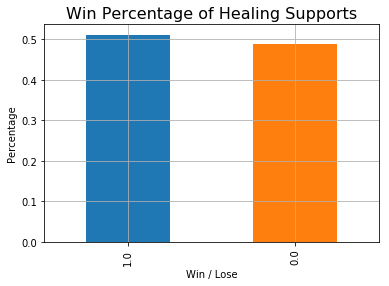

In [103]:
healerWinPct =  OnlyHealer.win.value_counts()/len(OnlyHealer)
print(healerWinPct)
healerWinPct.plot(kind='bar')
plt.title("Win Percentage of Healing Supports",size=16)
plt.xlabel("Win / Lose",size=10)
plt.ylabel("Percentage",size=10)
plt.grid(True)
plt.show()

In [102]:
#model to predict whether a healer support won or not
df = df.dropna()
df.win = df.win.astype(int)
df.name = df.name.astype(str)
df.adjposition = df.adjposition.astype(str)
df['HealerWon'] = df.win & df.isHealer
Y = df.HealerWon
X = df.drop(['id', 'matchid', 'player','isHealer', 'HealerWon',
                'win','version','platformid','adjposition','name'],axis=1)

In [27]:
norm = Normalizer()
normX = norm.fit_transform(X)
xtrain,xtest,ytrain,ytest = train_test_split(normX,Y,test_size=0.2,random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(xtrain,ytrain)
acc = log_reg.score(xtest,ytest)
print('Logistic Regression Accuracy: {}'.format(acc))

Logistic Regression Accuracy: 0.9856528700987648


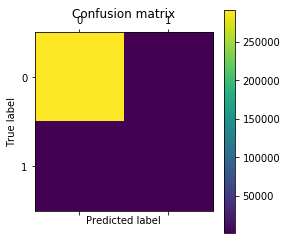

In [29]:
#We got a high accuracy percentage, lets visualize that.
y_pred = log_reg.predict(xtest)
cm = confusion_matrix(ytest,y_pred)

plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Lets see the Mean kills for AD Carries

In [101]:
#list of AD Carries
ADCarry = pd.DataFrame()
ad_carries_dict = ['Caitlyn','Lucian','Vayne','Xayah','Jinx',
                  'Ezrael','Ashe','Draven','Twitch','Miss Fortune'
                  ,'Jhin','Tristana','Varus','KogMaw','Sivit'
                  ,'Kalista','Graves','Corki']

In [31]:
ADCarry = df.ix[(df.adjposition == 'DUO_CARRY')]
onlyADC = pd.DataFrame()
ADCarry.head()

C:\Users\Gilad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,id,matchid,player,name,adjposition,win,kills,deaths,assists,largestmultikill,...,inhibkills,pinksbought,wardsplaced,duration,platformid,seasonid,version,KDA,isHealer,HealerWon
2,11,10,3,Draven,DUO_CARRY,0,7.0,8.0,5.0,2.0,...,0.0,1.0,13.0,1909,EUW1,8,7.10.187.9675,1.500,0,0
8,17,10,9,Jinx,DUO_CARRY,1,15.0,3.0,9.0,1.0,...,2.0,1.0,6.0,1909,EUW1,8,7.10.187.9675,8.000,0,0
11,20,11,2,Cassiopeia,DUO_CARRY,0,2.0,8.0,6.0,1.0,...,0.0,1.0,10.0,1693,EUW1,8,7.10.187.9675,1.000,0,0
15,24,11,6,Caitlyn,DUO_CARRY,1,12.0,5.0,4.0,2.0,...,1.0,1.0,6.0,1693,EUW1,8,7.10.187.9675,3.200,0,0
20,29,12,1,Draven,DUO_CARRY,0,4.0,8.0,5.0,2.0,...,0.0,0.0,4.0,1482,EUW1,8,7.10.187.9675,1.125,0,0


In [36]:
#Amount of games each AD carry was played
onlyADC = ADCarry[['name','kills','win']]
onlyADC['isADC'] = onlyADC.name.apply(lambda row: 1 if row in ad_carries_dict else 0)
onlyADC = onlyADC.drop(onlyADC[onlyADC.isADC == 0].index)
onlyADC = onlyADC.drop('isADC',axis=1)
onlyADC.name.value_counts()

C:\Users\Gilad\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Caitlyn         47380
Lucian          45017
Vayne           26763
Xayah           22872
Jinx            21702
Ashe            18177
Draven          16075
Twitch          14099
Miss Fortune    11812
Jhin            10995
Tristana        10080
Varus            7496
KogMaw           5866
Kalista          5417
Graves           1256
Corki            1104
Name: name, dtype: int64

In [41]:
ADCarryMeanKills = onlyADC.groupby('name').agg({'kills':'mean','win':'mean'})
ADCarryMeanKills.columns = [['Average Kills','Win Ratio']]
ADCarryMeanKills

,Average Kills,Win Ratio
name,,
Ashe,5.974033,0.499312
Caitlyn,6.443056,0.507767
Corki,7.763587,0.482790
Draven,7.823390,0.522551
Graves,7.566083,0.501592
Jhin,7.116871,0.466121
Jinx,7.390056,0.509216
Kalista,7.868747,0.486062
KogMaw,7.919195,0.529662


now lets visualize that

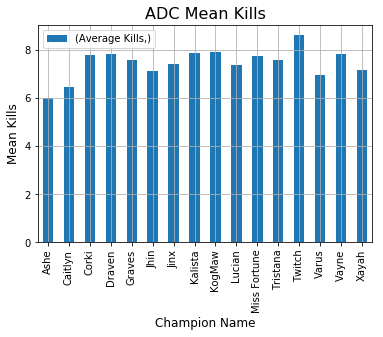

In [100]:
plt.figure(figsize=(16,16))
ADCarryMeanKills['Average Kills'].plot(kind='bar')
plt.grid(True)
plt.title('ADC Mean Kills',size=16)
plt.ylabel('Mean Kills',size=12)
plt.xlabel('Champion Name',size=12)
plt.legend()
plt.show()

##### Now lets try to make some more predictions

In [49]:
#Trying to predict a game's duration
df = df.dropna()
Y = df.duration
X = df.drop(['version','duration','platformid','adjposition','name'],axis=1)

In [50]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=42)

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_reg = LinearRegression()
lin_reg.fit(xtrain,ytrain)
ypred = lin_reg.predict(xtest)
acc_score = lin_reg.score(xtest,ytest)
print('LINEAR REGRESSION:\n')
print('RMSE Score: {}'.format(np.sqrt(mean_squared_error(ytest,ypred))))
print('Accuracy Score Is: {}'.format(acc_score))

LINEAR REGRESSION:

RMSE Score: 165.22983593915404
Accuracy Score Is: 0.8524106501960714


In [52]:
#Trying to predict a character's role

mapping = {'TOP': 0,'JUNGLE':1,'MID':2,'DUO_CARRY':3,'DUO_SUPPORT':4}
GuessRole = df.copy()
GuessRole = GuessRole.replace({"adjposition":mapping})

In [53]:
Role_Labels = GuessRole.adjposition
Role_features = GuessRole.drop(['adjposition','name','isHealer','HealerWon',
                               'platformid','version','id','matchid'],axis=1)

In [54]:
Role_norm = Normalizer()
norm_Role_Features = Role_norm.fit_transform(Role_features)

In [107]:
xtrain,xtest,ytrain,ytest = train_test_split(norm_Role_Features,Role_Labels,test_size=0.2,random_state=42)

In [108]:
log_reg = LogisticRegression()
log_reg.fit(xtrain,ytrain)
acc = log_reg.score(xtest,ytest)
print('Logistic Regression Accuracy: {}'.format(acc))

Logistic Regression Accuracy: 0.604059581797142


In [109]:
from sklearn.ensemble import RandomForestClassifier
ran_clf = RandomForestClassifier(random_state=0)
ran_clf.fit(xtrain,ytrain)
clf_acc = ran_clf.score(xtest,ytest)
print("Random Forest Classifier Accuracy Score: {}".format(clf_acc))

Random Forest Classifier Accuracy Score: 0.7828117010683818


Although we only scored 78% accuracy, considering the fact that we're trying to predict 5 roles
it means we're right for about 4 roles

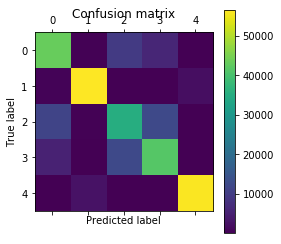

In [110]:
#Lets see which roles was the most confusing

y_pred = ran_clf.predict(xtest)
cm = confusion_matrix(ytest,y_pred)

plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [112]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred,target_names=mapping))

             precision    recall  f1-score   support

        TOP       0.71      0.73      0.72     59514
     JUNGLE       0.94      0.95      0.95     59397
        MID       0.61      0.59      0.60     59774
  DUO_CARRY       0.69      0.70      0.69     59409
DUO_SUPPORT       0.96      0.95      0.95     59178

avg / total       0.78      0.78      0.78    297272



In [59]:
#Letst try to classify our AD carries to Early/Mid/Late Game champions

ADCarry = df.ix[(df.adjposition == 'DUO_CARRY')]
onlyADC = pd.DataFrame()
ADCarry.head()

C:\Users\Gilad\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,id,matchid,player,name,adjposition,win,kills,deaths,assists,largestmultikill,...,inhibkills,pinksbought,wardsplaced,duration,platformid,seasonid,version,KDA,isHealer,HealerWon
2,11,10,3,Draven,DUO_CARRY,0,7.0,8.0,5.0,2.0,...,0.0,1.0,13.0,1909,EUW1,8,7.10.187.9675,1.500,0,0
8,17,10,9,Jinx,DUO_CARRY,1,15.0,3.0,9.0,1.0,...,2.0,1.0,6.0,1909,EUW1,8,7.10.187.9675,8.000,0,0
11,20,11,2,Cassiopeia,DUO_CARRY,0,2.0,8.0,6.0,1.0,...,0.0,1.0,10.0,1693,EUW1,8,7.10.187.9675,1.000,0,0
15,24,11,6,Caitlyn,DUO_CARRY,1,12.0,5.0,4.0,2.0,...,1.0,1.0,6.0,1693,EUW1,8,7.10.187.9675,3.200,0,0
20,29,12,1,Draven,DUO_CARRY,0,4.0,8.0,5.0,2.0,...,0.0,0.0,4.0,1482,EUW1,8,7.10.187.9675,1.125,0,0


In [60]:
onlyADC = ADCarry
onlyADC['isADC'] = onlyADC.name.apply(lambda row: 1 if row in ad_carries_dict else 0)
onlyADC = onlyADC.drop(onlyADC[onlyADC.isADC == 0].index)
onlyADC = onlyADC.drop('isADC',axis=1)

C:\Users\Gilad\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


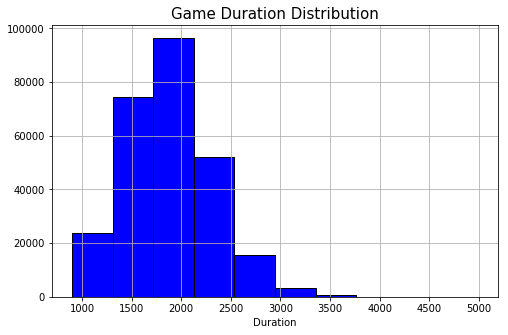

In [61]:
plt.figure(figsize=(8,5))
plt.title('Game Duration Distribution',fontsize=15)
plt.xlabel("Duration",fontsize=10)
plt.grid(True)
plt.hist(onlyADC.duration,color='blue',edgecolor='k')
plt.show()

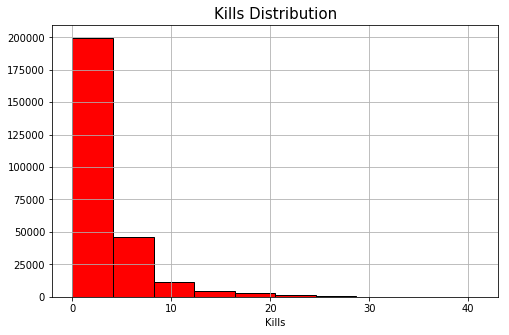

In [62]:
plt.figure(figsize=(8,5))
plt.title('Kills Distribution',fontsize=15)
plt.xlabel("Kills",fontsize=10)
plt.grid(True)
plt.hist(onlyADC.KDA,color='red',edgecolor='k')
plt.show()

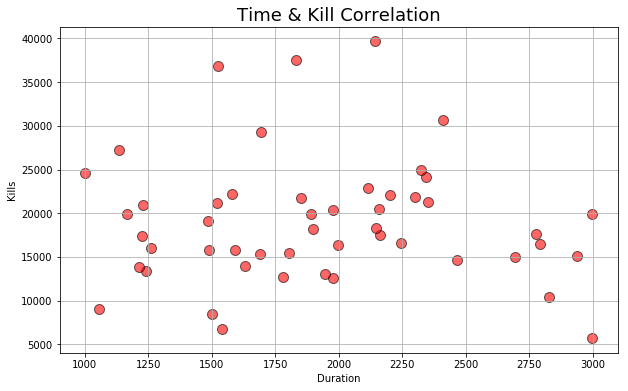

In [91]:
plt.figure(figsize=(10,6))
plt.title("Time & Kill Correlation",fontsize=18)
plt.grid(True)
plt.xlabel("Duration",fontsize=10)
plt.ylabel("Kills",fontsize=10)
plt.scatter(onlyADC['duration'].sample(50),onlyADC['totdmgtaken'].sample(50),color='red',alpha=0.6,s=100,edgecolors='k')
plt.show()

In [92]:
onlyADC.columns

Index(['id', 'matchid', 'player', 'name', 'adjposition', 'win', 'kills',
       'deaths', 'assists', 'largestmultikill', 'turretkills', 'totdmgtochamp',
       'totheal', 'totminionskilled', 'goldspent', 'totdmgtaken', 'inhibkills',
       'pinksbought', 'wardsplaced', 'duration', 'platformid', 'seasonid',
       'version', 'KDA', 'isHealer', 'HealerWon'],
      dtype='object')

In [123]:
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import scale
X = onlyADC.iloc[:,[6,19]].sample(50).values
#X = scale(X)

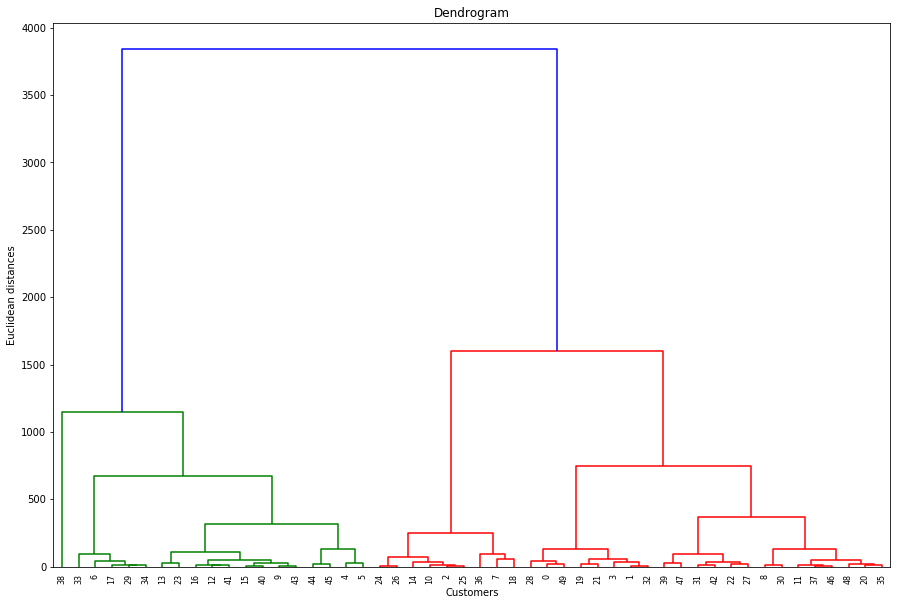

In [124]:
plt.figure(figsize=(15,10))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

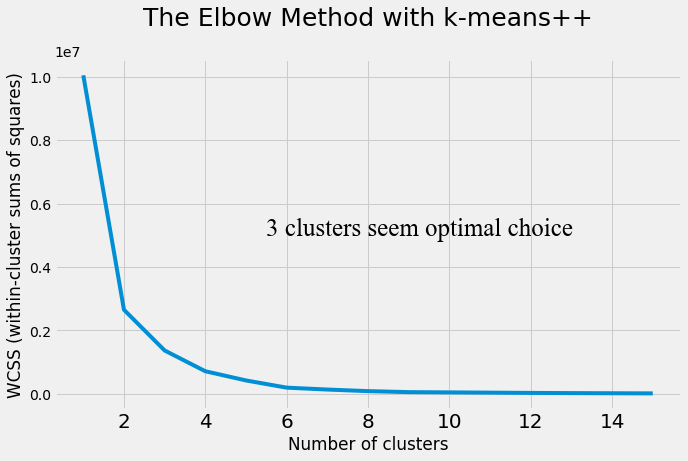

In [125]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

with plt.style.context(('fivethirtyeight')):
    plt.figure(figsize=(10,6))
    plt.plot(range(1, 16), wcss)
    plt.title('The Elbow Method with k-means++\n',fontsize=25)
    plt.xlabel('Number of clusters')
    plt.xticks(fontsize=20)
    plt.ylabel('WCSS (within-cluster sums of squares)')
    plt.text(x=5.5,y=5000000,s='3 clusters seem optimal choice',
             fontsize=25,fontdict={'family':'Times New Roman'})
    plt.show()

In [126]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

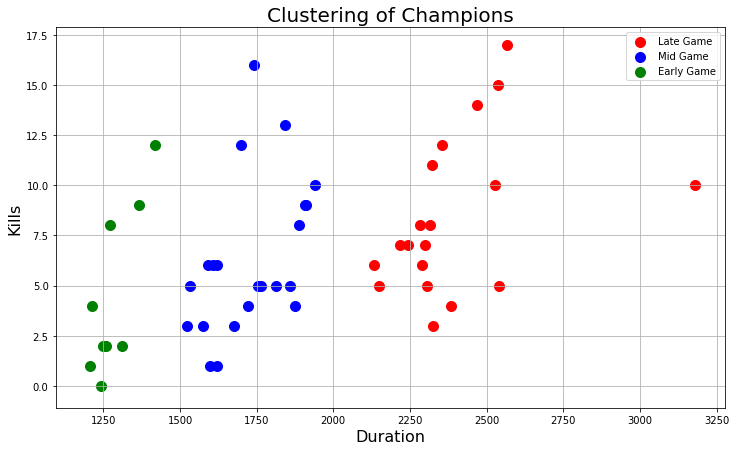

In [127]:
plt.figure(figsize=(12,7))
plt.scatter(X[y_hc == 0, 1],X[y_hc == 0, 0] , s = 100, c = 'red',label = 'Late Game')
plt.scatter(X[y_hc == 1, 1],X[y_hc == 1, 0] , s = 100, c = 'blue',label = 'Mid Game')
plt.scatter(X[y_hc == 2, 1],X[y_hc == 2, 0] , s = 100, c = 'green',label = 'Early Game')
plt.title('Clustering of Champions',fontsize=20)
plt.xlabel('Duration',fontsize=16)
plt.ylabel('Kills',fontsize=16)
plt.grid(True)
plt.legend()
plt.show()